# Introduction

This tutorial will focus on the tools necessary for scraping information from the web, cleaning it up, and visualizing the data. The visualization of data is an essential part of the data science pipeline, especially when we want to draw conclusions from a large data set. There are many ways to show data, but finding the best way is as much a science as it is an art. Using the proper tools and methods, visualizing data can reveal important trends in data that would not be noticed otherwise. 

Data visualization has seen a recent boom in use with fantasy sports. Fantasy sports allows fans to "draft" a team and recieve points based on their players real weekly performance. The best fantasy players often use statistics and past performance to determine which players to select on their team. Our goal in this tutorial is to give you the tools to visualize data how you want. To get started, let's look at an example of data visualization. The sportcharts [website](https://www.sportingcharts.com/nfl/fantasy-football/213957/aaron-rodgers/) offers a nice variety of charts and graphs, but sometimes we want to look at some custom data, which we will be focusing on here.


## Tutorial Content

In order to visualize data, we must first scrape te statistics we want from the web. In this tutorial we will work with [beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#), [pandas](https://pandas.pydata.org/), and [matplotlib](https://matplotlib.org/). These three packages alone combine to create a powerful tool for analyzing any sort of data that can be found on the web.

We will be using footballdb.com to gather our data, uploading it to a pandas dataframe, and visualizing it in different ways to identify trends and act as an aid for fantasy football.

Topics Covered:
* [Installing Libraries](#Installing-Libraries)
* [Web Scraping](#Web-Scraping)
* [Exploring Pandas Dataframes](#Exploring-Pandas-Dataframes)
* [Data Visualization](#Data-Visualization)
* [Additional Resources](#Additional-Resources)

# Installing Libraries

First we must install all of the python libraries we wil be using. All of the packages can be installed in terminal using the `pip` command.

* Beautiful Soup: pip install beautifulsoup4
* Pandas: pip install pandas
* MatPlotLib: pip install matplotlib

To make sure everything was properly downloaded, run the following code.

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Web Scraping

Now that we've installed all necessary libraries, we can move on to the first step. We are going to scrape data from the footballdb website (in this example we will only be exploring quarterback data, but this is applicable for any position). Our implementation here will show you how to scrape data for one week in the season and upload it into a data frame.

Some useful features of **BeautifulSoup** and the `find`, `find_all`, and `getText` methods. These allow you to search through the raw html and find certain nodes with information you want, then extract the desired text. Below, we used these methods to get our statistics from footballdb.com. Once we have the data it is simple reformatting, followed by adding all of our extracted data into a pandas dataframe.

In [2]:
def weeklyStats(url):
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    #find the actual table in the HTML
    table = soup.find("table", {"class" : "statistics scrollable"})
    headers = []
    i = -1
    
    for th in table.find(class_ = "header right").find_all("th"):
        i += 1
        #run if statements to pull headers from only the columns of interest
        if i in range(13, 17) or  i == 18 or i == 2: continue
        elif i in range(3, 9):    
            header = th.getText().lower()
            headers += ["pass-" + header]
        elif i in range(9, 13):
            header = th.getText().lower()
            headers += ["rush-" + header]
        else:
            header = th.getText().lower()
            headers += [header]
            
    data = []
    #pull all the data and load into lists
    for row in table.find("tbody").find_all("tr"):
        rowL = []
        i =-1
        for col in row.find_all("td"):
            i += 1
            if i == 0: 
                player = col.getText()
                name = player[0].join(player.split(player[0], 2)[:2])
                rowL += [name]
            elif i in range(13, 17) or  i == 18 or i == 2: continue
            else:
                rowL += [col.getText()]
        data += [rowL]
        
    #use .from_records to put all the lists into a dataframe
    df = pd.DataFrame.from_records(data, columns = headers)
    return df

The next step is to create a dataframe of dataframes using the `concat` method. By doing this, we are able to explore all of the data from the 2017 and find trends. 

In [3]:
def allWeeksStats():
    allWeeksdf = dict()
    #now we're gonna use string formatting to grab the url for each week and take that data
    for week in range(1,18):
        url = "https://www.footballdb.com/fantasy-football/index.html?pos=QB&yr=2017&wk=%s&rules=1" % (week)
        df = weeklyStats(url)
        allWeeksdf[week] = df
    #concat will put together all of our dataframes
    return pd.concat(allWeeksdf, keys = range(1, 18))

allWeeks = allWeeksStats()
allWeeks.head()

player     game pass-att pass-cmp pass-yds pass-td pass-int  \
1 0        Alex Smith    KC@NE       35       28      368       4        0   
  1  Matthew Stafford  ARI@DET       41       29      292       4        1   
  2      Sam Bradford   NO@MIN       32       27      346       3        0   
  3    Trevor Siemian  LAC@DEN       28       17      219       2        1   
  4      Carson Wentz  PHI@WAS       39       26      307       2        1   

    pass-2pt rush-att rush-yds rush-td rush-2pt fl  
1 0        0        5        3       0        0  0  
  1        0        2       14       0        0  0  
  2        0        2       -3       0        0  0  
  3        0        6       19       1        0  0  
  4        1        4        6       0        0  1

# Exploring Pandas Dataframes

Now that we have successfully created a dataframe of all QB stats for the entire season, let's play with our data a little. While visualizing the data is our ultimate goal, we first need to make sure we understand how to work with the data at hand using **pandas**. Let's start with the basics: actually viewing our dataframe. The `head` method allows us to view the first 5 rows of our dataframe.

In [4]:
allWeeks.head()

player     game pass-att pass-cmp pass-yds pass-td pass-int  \
1 0        Alex Smith    KC@NE       35       28      368       4        0   
  1  Matthew Stafford  ARI@DET       41       29      292       4        1   
  2      Sam Bradford   NO@MIN       32       27      346       3        0   
  3    Trevor Siemian  LAC@DEN       28       17      219       2        1   
  4      Carson Wentz  PHI@WAS       39       26      307       2        1   

    pass-2pt rush-att rush-yds rush-td rush-2pt fl  
1 0        0        5        3       0        0  0  
  1        0        2       14       0        0  0  
  2        0        2       -3       0        0  0  
  3        0        6       19       1        0  0  
  4        1        4        6       0        0  1

The statistics available from our website is robust, however we are missing the fantasy points scored each week. We can calculate this ourselves using the rules provided by FanDuel. 
![](files/image.png)
Once we have calculated the scores, we can add them to our existing dataframe.

In [5]:
def addFDScore(L):
    qbPoints = {'pass-yds': 0.04, 'pass-td': 4, 'int': -1, 'rush-yds': 0.1, 'rush-td': 6, 'fl': -2,}
    points = 0
    
    for cat, val in L:
        #some of our columns are not numerical so we have to make sure we only scrape the right ones
        try: mult = qbPoints[cat]
        except: mult = 0
        try: val = int(val)
        except: val = 0
        point = mult * val
        points += point
        
    return int(points)

def addFantasyPoints(df):
    headers = df.columns.tolist()
    allPoints = []
    
    for index, row in df.iterrows():
        stats = row.tolist()
        #list of tuples with the category and the value
        statList = list(zip(headers, stats))[2:]
        point = addFDScore(statList)
        allPoints += [point]
        
    #add a final column of fantasy points
    df["fantasy-points"] = allPoints
    return df
        
allWeeks = addFantasyPoints(allWeeks)    
allWeeks.head(n = 10)

player     game pass-att pass-cmp pass-yds pass-td pass-int  \
1 0          Alex Smith    KC@NE       35       28      368       4        0   
  1    Matthew Stafford  ARI@DET       41       29      292       4        1   
  2        Sam Bradford   NO@MIN       32       27      346       3        0   
  3      Trevor Siemian  LAC@DEN       28       17      219       2        1   
  4        Carson Wentz  PHI@WAS       39       26      307       2        1   
  5       Philip Rivers  LAC@DEN       33       22      192       3        1   
  6          Derek Carr  OAK@TEN       32       22      262       2        0   
  7              Tyrod   NYJ@BUF       28       16      224       2        1   
  8  Ben Roethlisberger  PIT@CLE       36       24      263       2        1   
  9           Matt Ryan  ATL@CHI       30       21      321       1        0   

    pass-2pt rush-att rush-yds rush-td rush-2pt fl  fantasy-points  
1 0        0        5        3       0        0  0              31  
  1        0        2       14       0        0  0              29  
  2        0        2       -3       0        0  0              25  
  3        0        6       19       1        0  0              24  
  4        1        4        6       0        0  1              18  
  5        0        0        0       0        0  0              19  
  6        0        2        2       0        0  0              18  
  7        0        8       38       0        0  0              20  
  8        0        3       -8       0        0  0              17  
  9        0        3       11       0        0  0              17

Now that we know how to sort through our weekly data in this big dataframe, let's try to extract data for Tom Brady through the season. The `loc` method allows us to search through our dataframe and pinpoint any value we want.

In [6]:
def getPlayerStats(player, df):
    headers = df.columns.tolist()
    df = df.loc[df['player'] == player]
    df = df.reset_index()
    df = df.rename(columns = {"level_0" : "week"})
    return df

getPlayerStats("Tom Brady", allWeeks)

,week,level_1,player,game,pass-att,pass-cmp,pass-yds,pass-td,pass-int,pass-2pt,rush-att,rush-yds,rush-td,rush-2pt,fl,fantasy-points
0,1,21,Tom Brady,KC@NE,36,16,267,0,0,0,2,0,0,0,0,10
1,2,0,Tom Brady,NE@NO,39,30,447,3,0,0,2,9,0,0,0,30
2,3,0,Tom Brady,HOU@NE,35,25,378,5,0,1,1,6,0,0,1,33
3,4,10,Tom Brady,CAR@NE,45,32,307,2,0,0,1,2,0,0,0,20
4,5,16,Tom Brady,NE@TB,40,30,303,1,1,0,2,5,0,0,1,14
5,6,8,Tom Brady,NE@NYJ,38,20,257,2,1,0,1,-1,0,0,0,18
6,7,10,Tom Brady,ATL@NE,29,21,249,2,0,0,5,5,0,0,0,18
7,8,8,Tom Brady,LAC@NE,47,32,333,1,0,0,1,2,0,0,0,17
8,10,4,Tom Brady,NE@DEN,34,25,266,3,0,0,1,0,0,0,0,22
9,11,3,Tom Brady,NE@OAK,37,30,340,3,0,0,0,0,0,0,0,25


Now that we have covered the basics of data exploration, let's move onto the best part: visualizing data.

# Data Visualization

The reason scraping our own data is so useful is that now we can choose what stats we want to look at. We can use the **matplotlib** library to create line. In order to select a quarterback, we want to see consistent good play from them. Let's create a line graph of his weekly performance for the statistic of our choosing. As you get more into the detials of fantasy, different statistics can be useful but, for now, fantasy points is the most obvious statistic to visualize.

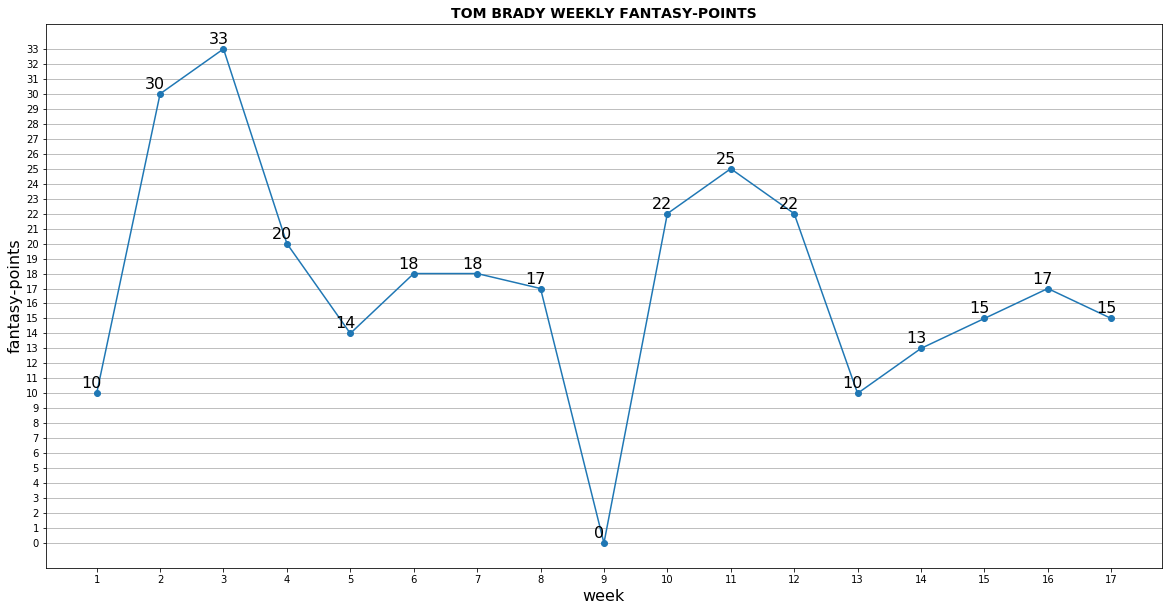

In [7]:
def getweeklyStats(player, stat, df):
    playerdf = getPlayerStats(player, df)
    stats = playerdf[stat].tolist()
    #in df our values are strings so we have to convert
    stats = [int(stat) for stat in stats]
    weekList = playerdf['week'].tolist()
    statList = list(zip(weekList, stats))
    weeksPlayed = []
    
    for week, val in statList:
        weeksPlayed.append(week)
    #add row of zeroes for bye-week or injured weeks
    for i in range(18):
        if i not in weeksPlayed: statList.append((i, 0))
            
    statList = sorted(statList, key = lambda x:x[0])
    return statList[1:]


def viewSeasonGraph(player, stat, df):
    statList = getweeklyStats(player, stat, df)
    weeks = [x[0] for x in statList]
    values = [x[1] for x in statList]
    fig = plt.figure(figsize=(20,10))
    ax = plt.axes()
    #add labels for each point value
    for (week, val) in statList:
        ax.annotate('{}'.format(val), xy=(week, val), xytext=(-5, 5), ha='center',
                textcoords='offset points', fontsize = 16)
    #add title, gridlines, and format tick marks probably
    plt.title((player + " weekly " + stat).upper(), fontsize=14, fontweight='bold')
    plt.plot(weeks, values, marker = "o")
    plt.gca().yaxis.grid(True)
    plt.xlabel('week', fontsize = 16)
    plt.xticks(np.arange(1, 18, 1.0))
    #set the y tick mark based on range of data points
    if max(values)-min(values) <= 17: tick = 1
    else: tick = int((max(values)-min(values))/17)
    plt.yticks(np.arange(min(values), max(values)+1, tick))
    plt.ylabel(stat, fontsize = 16)
    return plt.show()


viewSeasonGraph("Tom Brady", "fantasy-points", allWeeks)

Amazing! As we can see from the graph above, Tom Brady is quite the quarterback (not enough for the Eagles I guess), but how does he compare to the rest of the league? Let's try to plot this data side by side with the average for all quarterbacks in a given week. It is similar to the code above, but now we are going to play around with the sizing and legends. Read [this article](https://matplotlib.org/users/text_intro.html) for some useful methods to redo your graph.

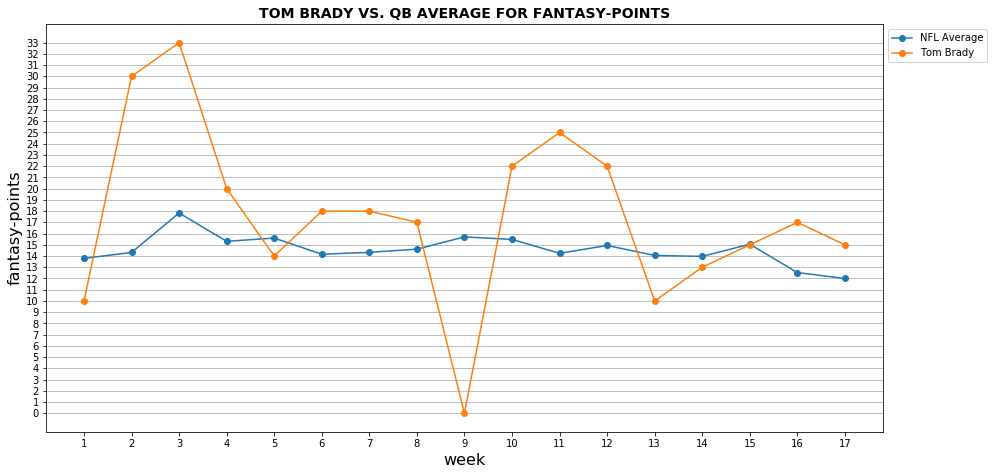

In [8]:
def weeklyAVG(stat, df):
    output = []
    #get each week's average for all qbs
    for i in range(1, 18):
        weekL = allWeeks.loc[i][stat].tolist()
        weekL = [int(val) for val in weekL]
        avg = sum(weekL)/len(weekL)
        output.append(round(avg, 2))
        
    return output

def compareToAVG(player, stat, df):
    #similar to code above, but plot second line as well
    avgList = weeklyAVG(stat, df)
    playerList = getweeklyStats(player, stat, df)
    playerList = [tup[1] for tup in playerList]
    weeks = range(1, 18)
    plt.figure(figsize=(15,7.5))
    plt.plot(weeks, avgList, marker = "o", label = "NFL Average")
    plt.plot(weeks, playerList, marker = "o", label = player)
    #add legend
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
    plt.title((player + " vs. QB average for " + stat).upper(), fontsize=14, fontweight='bold')
    plt.gca().yaxis.grid(True)
    plt.xlabel('week', fontsize = 16)
    plt.xticks(np.arange(1, 18, 1.0))
    if max(avgList + playerList)-min(avgList + playerList) <= 17: tick = 1
    else: tick = int((max(avgList + playerList)-min(avgList + playerList))/17)
    plt.yticks(np.arange(min(avgList + playerList), max(avgList + playerList)+1, tick))
    plt.ylabel(stat, fontsize = 16)
    return plt.show()
    

compareToAVG("Tom Brady", "fantasy-points", allWeeks)

It's starting to look like Tom Brady might be a very good choice for quaterback. But let's stack him against another quaterback in the league and see how they compare. We could do a line graph again, but there is likely going to be a lot of variation in our lines, so a side-by-side bar graph would be more useful.

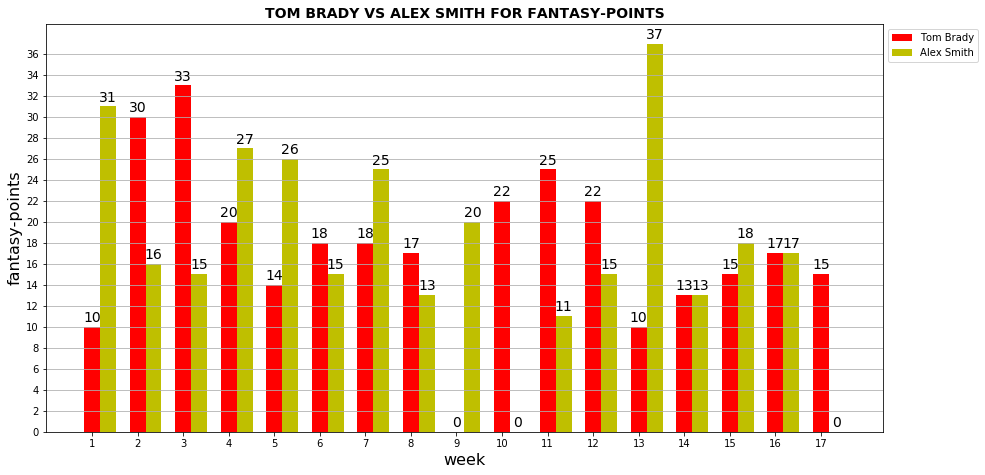

In [9]:
def compareTwoPlayers(p1, p2, stat, df):
    #make a bar graph
    width = 0.35
    p1List = getweeklyStats(p1, stat, df)
    p2List = getweeklyStats(p2, stat, df)
    weeks = np.arange(1, 18)
    p1Vals = [x[1] for x in p1List]
    p2Vals = [x[1] for x in p2List]
    fig, ax= plt.subplots(figsize = (15, 7.5))
    p1Bars = ax.bar(weeks, p1Vals, width, color='r', label = p1)
    p2Bars = ax.bar(weeks + width, p2Vals, width, color = "y", label = p2)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
    plt.title((p1 + " vs " + p2 + " for " + stat).upper(), fontsize=14, fontweight='bold')
    plt.xlabel('week', fontsize = 16)
    plt.xticks(np.arange(1, 18, 1.0))
    plt.gca().yaxis.grid(True)
    
    weekCounter = 0
    for val in p1Vals:
        weekCounter += 1
        ax.annotate('{}'.format(val), xy=(weekCounter, val), xytext=(0, 5), ha='center',
                textcoords='offset points', fontsize = 14)
    
    weekCounter = 0
    for val in p2Vals:
        weekCounter += 1
        ax.annotate('{}'.format(val), xy=(weekCounter + width, val), xytext=(0, 5), ha='center',
                textcoords='offset points', fontsize = 14)
        
    if max(p1Vals + p2Vals)-min(p1Vals + p2Vals) <= 17: tick = 1
    else: tick = int((max(p1Vals + p2Vals)-min(p1Vals + p2Vals))/17)
    plt.yticks(np.arange(min(p1Vals + p2Vals), max(p1Vals + p2Vals)+1, tick))
    plt.ylabel(stat, fontsize = 16)
    return plt.show()

compareTwoPlayers("Tom Brady", "Alex Smith", "fantasy-points", allWeeks)

And you're done! Now you have all the tools necessary to begin your own work in data visualization. Make sure to give me credit when you're making lots of money on FanDuel one day.

# Additional Resources

* [BeautifulSoup](https://programminghistorian.org/lessons/intro-to-beautiful-soup)
    * a good example of how to parse through html 
* [PandasDB](https://pandas.pydata.org/pandas-docs/stable/10min.html)
    * common methods and tools you can use with dataframes
* [MatPlotLib](https://matplotlib.org/users/index.html)
    * various visualization tools
* [FanDuel](https://www.fanduel.com/)
    * if you ever feel like trying your hand at some fantasy football